In [31]:
import numpy as np
import matplotlib.pyplot as plt

nx = 10
ny = 10


Tipo_Cond = [0,0,0,1]  #0 para temperatura, 1 para flujo de calor
Cond_contor = [75,100,50,0]
#  [izquierda, arriba, derecha, abajo]



n = nx * ny
beta = nx/ny 


Matriz = np.eye(n,n)
Vector_B = np.zeros(n)


In [32]:

for i in range (1,nx-1):
    for j in range (1,ny-1):
        k = i + j * nx
        Matriz[k,k] = -2 * (beta**2 + 1) 
        Matriz[k,k+nx] = beta**2
        Matriz[k,k-nx] = beta**2
        Matriz[k,k-1] = 1
        Matriz[k,k+1] = 1


In [33]:
esquinas = np.zeros(4)
esquinas[0] = 0
esquinas[1] = nx-1
esquinas[2] = (ny-1)*nx
esquinas[3] = (nx-1) + (ny-1)*nx

In [36]:

Bordes = np.zeros(len(Cond_contor))
ubicacion = 0
#  [izquierda, arriba, derecha, abajo]
for i in Cond_contor:
    if Tipo_Cond[ubicacion] == 0:
        Bordes[ubicacion] = i
    elif Tipo_Cond[ubicacion] == 1:
        if ubicacion == 0:
            Bordes[0] = 2*(1/(nx+1))*i
        elif ubicacion == 1:
            Bordes[1] = 2*beta*(1/(ny+1))*i                                  
        elif ubicacion == 2:
            Bordes[2] =2*(1/(nx+1))*i                                   
        elif ubicacion == 3:
            Bordes[ubicacion] = 2*beta*(1/(ny+1))*i                                  
    ubicacion += 1

    
    
l = 0

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        # if k in esquinas:
        #     Vector_B[k] = T_prom[l]
        #     l += 1
        if i == 0 :
            if Tipo_Cond[0] == 0:
                Vector_B[k] = Bordes[0]

            elif Tipo_Cond[0] == 1:            
                Matriz[k,k+1]=2           
                Matriz[k,k-nx]=beta**2             
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+nx]=beta**2               
                Vector_B[k] = Bordes[0]             
        elif i == nx-1 : 
            if Tipo_Cond[2] == 0:
                Vector_B[k] = Bordes[2]

            elif Tipo_Cond[2] == 1:            
                Matriz[k,k-1]=2           
                Matriz[k,k-nx]=beta**2             
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+nx]=beta**2 
                Vector_B[k] = Bordes[2]                   

        elif j == 0:
            if Tipo_Cond[3] == 0:
                Vector_B[k] = Bordes[3]

            elif Tipo_Cond[3] == 1:            
                Matriz[k,k+1]=1           
                Matriz[k,k-1]=1  
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k+nx]=2*beta**2               
                Vector_B[k] = Bordes[3]                   

            
        elif j == ny-1:
            if Tipo_Cond[1] == 0:
                Vector_B[k] = Bordes[1] 

            elif Tipo_Cond[1] == 1:            
                Matriz[k,k+1]=1           
                Matriz[k,k-1]=1  
                Matriz[k,k]=-2*(1+beta**2)
                Matriz[k,k-nx]=2*beta**2            
                Vector_B[k] = Bordes[1]                 
                 

        
Vector_B[0]= Bordes[0]
Vector_B[nx-1]= Bordes[2] 
Vector_B[-(nx)]= (Bordes[1]+Bordes[0])/2
Vector_B[-1]=(Bordes[2]+Bordes[1])/2 
    
    

print(Vector_B)

[ 75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   75.    0.    0.    0.    0.    0.
   0.    0.    0.   50.   75.    0.    0.    0.    0.    0.    0.    0.
   0.   50.   75.    0.    0.    0.    0.    0.    0.    0.    0.   50.
  75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   87.5 100.  100.  100.  100.  100.
 100.  100.  100.   75. ]


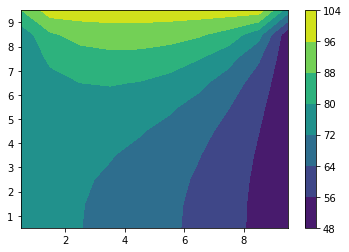

In [40]:
T = np.linalg.solve(Matriz,Vector_B)
Matriz_Temp = np.zeros([nx,ny])

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        #Matriz_Temp[ny-1-j,i] = T[k]
        #Matriz_Temp[ny-1,nx-1] = T_prod4 
        #Matriz_Temp[0,nx-1] = T_prod3 
        Matriz_Temp[j,i] = T[k]
        
        
        
#print(Matriz_Temp)
plt.contourf(Matriz_Temp, origin = 'lower')
plt.colorbar()

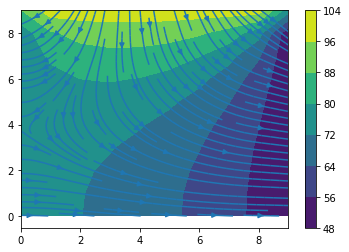

In [38]:
dx = 1/(nx+1)
dy = 1/(ny+1)
Flujox = np.zeros([nx,ny]) 
Flujoy = np.zeros([nx,ny])

x = np.linspace(0,nx-1,nx).astype(int)
y = np.linspace(0,ny-1,ny).astype(int)
X,Y = np.meshgrid(x,y)


for i in range (nx-1):
    for j in range (ny-1):
        k = i + j * nx
        if k == esquinas[0]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dy)
        elif k == esquinas[1]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[2]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[3]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)         
        elif i == 0 :
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)
        elif i == nx-1 :         
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif j == 0:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        elif j == ny-1:          
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        else:
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)

plt.contourf(X,Y,Matriz_Temp, origin = 'upper')
plt.colorbar()        
plt.streamplot(X,Y,-Flujox,-Flujoy)